<a href="https://colab.research.google.com/github/i1nourax/i1nourax/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [1]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
 84% 4.00M/4.75M [00:00<00:00, 6.06MB/s]
100% 4.75M/4.75M [00:00<00:00, 5.26MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [2]:
import keras
import os
import numpy as np
from keras import layers, models, datasets, Input
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [3]:
df1 = pd.read_csv('Bus_Breakdown_and_Delays.csv')
df1.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [4]:
df1.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [6]:
df1.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [7]:
df1.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [8]:
df1.duplicated().sum()

0

In [9]:
df1.nunique()

,0
School_Year,4
Busbreakdown_ID,147972
Run_Type,10
Bus_No,10765
Route_Number,11283
Reason,10
Schools_Serviced,5180
Occurred_On,70108
Created_On,75822
Boro,11


In [10]:
df1['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,130857
Breakdown,17115


In [11]:
df1['School_Age_or_PreK'].value_counts()

,count
School_Age_or_PreK,
School-Age,127003
Pre-K,20969


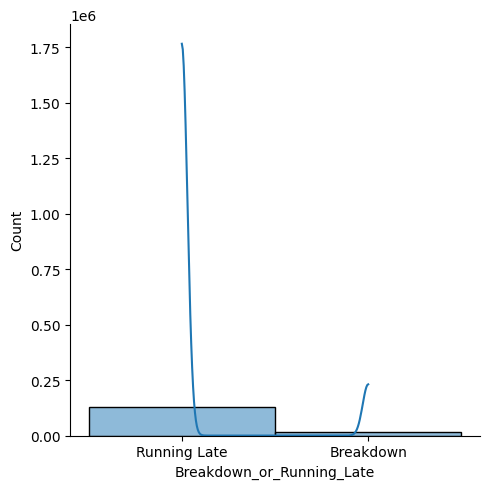

In [12]:
import seaborn as sns
sns.displot( data=df1, x="Breakdown_or_Running_Late", kde=True )

In [14]:
num = df1.select_dtypes(include=['int64', 'float64'])

In [15]:
num

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
0,1224901,5
1,1225098,3
2,1215800,12
3,1215511,11
4,1215828,12
...,...,...
147967,1338452,7
147968,1341521,0
147969,1353044,0
147970,1353045,0


In [16]:
num.corr()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
Busbreakdown_ID,1.000000,-0.016243
Number_Of_Students_On_The_Bus,-0.016243,1.000000


<Axes: >

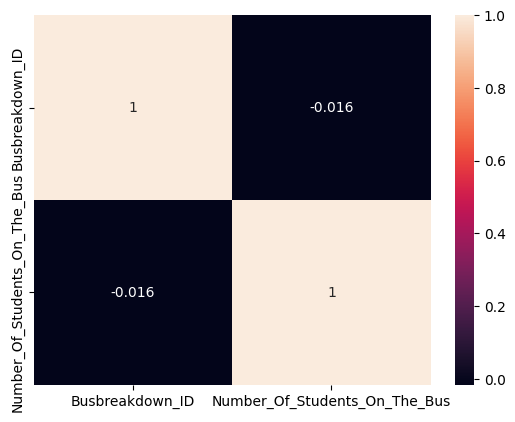

In [17]:
dataplot = num.corr()
sns.heatmap(data=dataplot, annot=True)

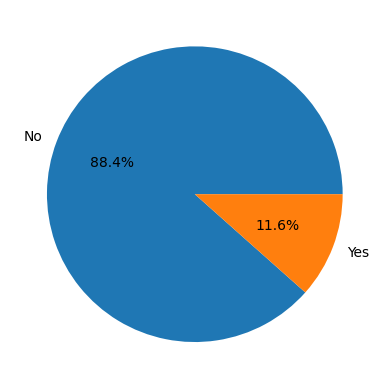

In [18]:
import matplotlib.pyplot as plt

plt.pie(df1['Breakdown_or_Running_Late'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Breakdown_or_Running_Late'] = encoder.fit_transform(df1['Breakdown_or_Running_Late'])

In [20]:
df1.drop(columns='School_Age_or_PreK', inplace=True)

In [21]:
df1

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,1
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,1
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,1
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,1
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,"G.V.C., LTD.",15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,1
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,"G.V.C., LTD.",20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,1
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,G.V.C. LTD. (B2192),20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,1
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,LITTLE RICHIE BUS SERVICE,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,0


In [22]:
df1['Breakdown_or_Running_Late'].unique()

array([1, 0])

In [23]:
from sklearn.model_selection import train_test_split

x = df1.drop(columns='Breakdown_or_Running_Late', axis=1)
y = df1['Breakdown_or_Running_Late']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

non_numeric_cols = x_train.select_dtypes(exclude=['number']).columns

for col in non_numeric_cols:
    all_unique_values = list(set(x_train[col].unique()) | set(x_test[col].unique()))
    label_encoder.fit(all_unique_values)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [26]:
model = Sequential()

In [27]:
model.add(Dense(units=6, activation='relu'))

In [28]:
model.add(Dense(units=6, activation='relu'))

In [29]:
model.add(Dense(units=1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = x_train.select_dtypes(include=['number']).columns
x_train_numerical = x_train[numerical_cols]

x_train_scaled = scaler.fit_transform(x_train_numerical)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = x_train.select_dtypes(include=['number']).columns
x_train_numerical = x_train[numerical_cols]
x_train_scaled = scaler.fit_transform(x_train_numerical)

x_test_numerical = x_test[numerical_cols]
x_test_scaled = scaler.transform(x_test_numerical)

model.evaluate(x_test_scaled, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8859 - loss: 0.6782


[0.6781309843063354, 0.8870755434036255]

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [45]:
y_pred = model.predict(x_test_scaled)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [46]:
y_pred = model.predict(x_test_scaled)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [47]:
print(model.history.history.keys())

dict_keys([])


## Save the Model
Save the trained model for submission.

In [48]:
model.save('model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: